# 糖尿病分类预测
张纹宾 & 王思媛

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV 

from matplotlib import pyplot as plt
import seaborn as sns 
import matplotlib.style as style 
style.use('fivethirtyeight')
from matplotlib import rcParams    
rcParams['axes.unicode_minus']=False    #让坐标轴显示负号

plt.rcParams['font.sans-serif'] = ['SimHei']    #用来正常显示中文标签
import warnings
warnings.filterwarnings("ignore")    #忽视warning

In [2]:
data = pd.read_csv('diabetes.csv')    # 导入数据集

In [3]:
data.head(10)    # 查看数据

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
data.info    # 查看数据集的信息

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [5]:
data.isnull().sum()    #查看数据集缺失情况

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.describe().T  # 数据集描述统计

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
data['Outcome'].value_counts()     # 按病状分类

0    500
1    268
Name: Outcome, dtype: int64

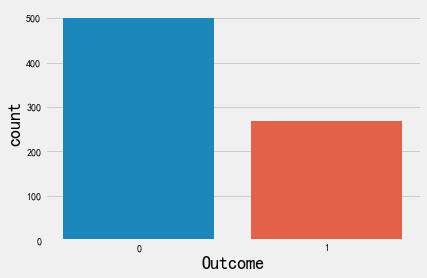

In [8]:
'''
可视化病人情况
'''
plt.figure(figsize=(6, 4))
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Outcome', fontsize = 18)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
sns.countplot(data['Outcome'], label="Count")

有可视化结果可知，两类的数量相差不大，不需要进行不平衡数据处理

In [9]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]    #拆分数据
X.corr()    # 计算相关系数

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


由相关系数矩阵可知，变量之间不存在高度线性相关关系（r > 0.8），近似认为各变量之间相互独立

In [10]:
data.corr()['Outcome']    # 计算特征变量和响应变量的相关系数

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

查看各变量与Outcome之间的关系，得到BloodPressure、SkinThickness与Outcome之间的相关性不大，因此将他们从变量中剔除。但由于我们不知道剔除这两个变量会对模型拟合的精确度造成什么样的影响，因此在下述模型拟合的过程中，我们分别对未剔除这两个变量的数据，以及剔除了这两个变量的数据都做了相同的模型拟合。

In [11]:
highly_correlated_features = data.columns[data.corr()['Outcome'].abs() > 0.1]    # 提取相关系数大于0.1的特征变量
# highly_correlated_features
highly_correlated_features = highly_correlated_features.drop('Outcome')
# highly_correlated_features 
X_subsetted = X[highly_correlated_features]

In [12]:
X_sta = StandardScaler().fit_transform(X)    # 对数据进行标准化处理
X_clean_sta = StandardScaler().fit_transform(X_subsetted)    # 对处理后的数据进行标准化处理

In [13]:
X_sta = pd.DataFrame(X_sta, columns=X.columns)
X_clean_sta = pd.DataFrame(X_clean_sta, columns=X_subsetted.columns)

In [14]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_sta,y,test_size=0.2)    # 对原始数据拆分训练集和测试集
Xtrain_clean, Xtest_clean, Ytrain_clean, Ytest_clean = train_test_split(X_clean_sta,y,test_size=0.2)    # 对数理后的数据拆分训练集和测试集

In [15]:
'''
定义网格搜索函数
'''

def get_best_model_and_accuracy(model, params, Xtrain, Ytrain, Xtest, Ytest): 
    grid = GridSearchCV(model, # 要搜索的模型
                        params, # 要尝试的参数
                        error_score=0.) # 如果报错，结果是 0 
    model = grid.fit(Xtrain, Ytrain) # 拟合模型和参数
    
    print()
    # 经典的性能指标
    print("Best Accuracy: {}".format(grid.best_score_))
    # 测试集准确率
    print(f'Test Accuracy: {model.score(Xtest, Ytest)}')
    # 得到最佳准确率的最佳参数
    print("Best Parameters: {}".format(grid.best_params_)) 
    # 拟合的平均时间（秒）
#     print("Average Time to Fit (s):{}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3))) 
    # 预测的平均时间（秒）
    # 从该指标可以看出模型在真实世界的性能
#     print("Average Time to Score (s):{}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

    return model.score(Xtest, Ytest)

In [16]:
from sklearn.linear_model import LogisticRegression    # 逻辑回归
from sklearn.neighbors import KNeighborsClassifier    #KNN
from sklearn.tree import DecisionTreeClassifier    # 决策树
from sklearn.ensemble import RandomForestClassifier    # 随机森林
from sklearn.svm import SVC    #支持向量机
from sklearn.neural_network import MLPClassifier    # 深度学习

In [17]:
# 为网格搜索设置变量
# 先设置机器学习模型的参数
# 逻辑回归
lr_params = {'C':[1e-2, 1e-1, 1e0, 1e1, 1e2], 'penalty':['l1', 'l2']} 
# KNN 
knn_params = {'n_neighbors': [i for i in range(1,31)]} 
# 决策树
tree_params = {'max_depth':[i for i in range(1,21)]} 
# 随机森林
forest_params = {'n_estimators': [10, 50, 100], 'max_depth': [None, 1, 3, 5, 7]} 
# 支持向量机
svc_params = {'C':[i for i in range(1,21)]}
# 多层感知器
deep_learn_params = {'max_iter':[3000], 'alpha':[0.01, 0.05, 0.1, 0.5, 1.0], 'hidden_layer_sizes':[(16,16), (16,16,16), (16,16,16, 16)],}

这次模型我们使用到了逻辑回归，K近邻、决策树、随机森林、支持向量机、多层感知器，并使用了网格搜索寻找各模型中的最优参数。

In [18]:
score = {}
score_clean = {}

In [19]:
# 实例化机器学习模型
lr = LogisticRegression() 
knn = KNeighborsClassifier() 
d_tree = DecisionTreeClassifier() 
forest = RandomForestClassifier() 
svc = SVC()
mlp = MLPClassifier()

In [20]:
# 逻辑回归(初始数据)
lr_score = get_best_model_and_accuracy(lr, lr_params, Xtrain, Ytrain, Xtest, Ytest)
score["lr"] = lr_score


Best Accuracy: 0.7735972277755565
Test Accuracy: 0.7077922077922078
Best Parameters: {'C': 0.01, 'penalty': 'l2'}


In [21]:
# 逻辑回归（处理后的数据）
lr_clean_score = get_best_model_and_accuracy(lr, lr_params, Xtrain_clean, Ytrain_clean, Xtest_clean, Ytest_clean)
score_clean["lr"] = lr_clean_score


Best Accuracy: 0.7654404904704785
Test Accuracy: 0.7987012987012987
Best Parameters: {'C': 10.0, 'penalty': 'l2'}


In [22]:
# KNN（初始数据）
knn_score =get_best_model_and_accuracy(knn, knn_params, Xtrain, Ytrain, Xtest, Ytest) 
score["KNN"] = knn_score


Best Accuracy: 0.767093162734906
Test Accuracy: 0.7207792207792207
Best Parameters: {'n_neighbors': 21}


In [23]:
# KNN（处理后数据）
knn_clean_score = get_best_model_and_accuracy(knn, knn_params, Xtrain_clean, Ytrain_clean, Xtest_clean, Ytest_clean) 
score_clean["KNN"] = knn_clean_score


Best Accuracy: 0.7703052112488338
Test Accuracy: 0.7402597402597403
Best Parameters: {'n_neighbors': 21}


In [24]:
# 决策树（原始数据）
tree_score = get_best_model_and_accuracy(d_tree, tree_params, Xtrain, Ytrain, Xtest, Ytest) 
score["tree"] = tree_score


Best Accuracy: 0.740983606557377
Test Accuracy: 0.7337662337662337
Best Parameters: {'max_depth': 2}


In [25]:
# 决策树（处理后数据）
tree_clean_score = get_best_model_and_accuracy(d_tree, tree_params, Xtrain_clean, Ytrain_clean, Xtest_clean, Ytest_clean) 
score_clean["tree"] = tree_clean_score


Best Accuracy: 0.7409836065573769
Test Accuracy: 0.7662337662337663
Best Parameters: {'max_depth': 5}


In [26]:
# 随机森林（初始数据）
forest_score = get_best_model_and_accuracy(forest, forest_params, Xtrain, Ytrain, Xtest, Ytest)
score["forest"] = forest_score


Best Accuracy: 0.7784486205517793
Test Accuracy: 0.7597402597402597
Best Parameters: {'max_depth': 5, 'n_estimators': 100}


In [27]:
# 随机森林（处理后数据）
forest_clean_score = get_best_model_and_accuracy(forest, forest_params, Xtrain_clean, Ytrain_clean, Xtest_clean, Ytest_clean)
score_clean["forest"] = forest_clean_score


Best Accuracy: 0.7703318672530988
Test Accuracy: 0.8051948051948052
Best Parameters: {'max_depth': 3, 'n_estimators': 100}


In [28]:
# 支持向量机（初始数据）
svc_score = get_best_model_and_accuracy(svc, svc_params, Xtrain, Ytrain, Xtest, Ytest)
score["SVC"] = svc_score


Best Accuracy: 0.771944555511129
Test Accuracy: 0.7272727272727273
Best Parameters: {'C': 1}


In [29]:
# 支持向量机（处理后数据）
svc_clean_score = get_best_model_and_accuracy(svc, svc_params, Xtrain_clean, Ytrain_clean, Xtest_clean, Ytest_clean)
score_clean["SVC"] = svc_clean_score


Best Accuracy: 0.7638144742103159
Test Accuracy: 0.7727272727272727
Best Parameters: {'C': 1}


In [30]:
# 多层感知器（初始数据）
mlp_score = get_best_model_and_accuracy(mlp, deep_learn_params, Xtrain, Ytrain, Xtest, Ytest)
score["MLP"] = mlp_score


Best Accuracy: 0.7800479808076769
Test Accuracy: 0.7467532467532467
Best Parameters: {'alpha': 1.0, 'hidden_layer_sizes': (16, 16), 'max_iter': 3000}


In [31]:
# 多层感知器（处理后数据）
mlp_clean_score = get_best_model_and_accuracy(mlp, deep_learn_params, Xtrain_clean, Ytrain_clean, Xtest_clean, Ytest_clean)
score_clean["MLP"] = mlp_clean_score


Best Accuracy: 0.7735972277755564
Test Accuracy: 0.7922077922077922
Best Parameters: {'alpha': 1.0, 'hidden_layer_sizes': (16, 16), 'max_iter': 3000}


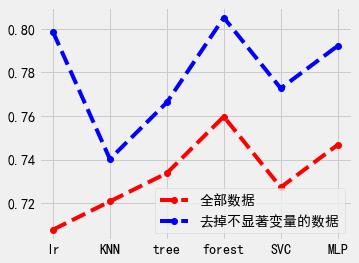

In [38]:
fig,ax = plt.subplots(figsize=(5,4))
plt.plot(list(score.keys()), list(score.values()), c = "red",linestyle = "--",marker = "o")
plt.plot(list(score_clean.keys()), list(score_clean.values()), c = "blue",linestyle = "--",marker = "o")
plt.legend(["全部数据","去掉不显著变量的数据"])
plt.show()

由测试得分可视化结果可知：首先，比较明显的是，去掉两个不显著变量后模型的测试得分普遍增高，意味着剔除不显著变量是有意义的；其次，几个模型的拟合效果都比较不错，普遍在0.7~0.8之间，其中去掉不显著变量后拟合的LR模型和随机森林模型的效果比较好，考虑到模型的复杂度，我们会更倾向于使用LR逻辑回归模型去预测糖尿病，最优参数为C: 10.0, penalty: l2。